In [1]:
import numpy as np
import librosa
import librosa.display
import scipy.io.wavfile as wavfile
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython
%matplotlib inline

In [48]:
def plot_audio(fname):
    # read audio
    rate, data = wavfile.read(fname)
    fig, ax = plt.subplots(2,1,figsize=(16,6))
    # spectrogram
    f, t, Sx = signal.spectrogram(data, fs=rate)
    d = 20*np.log10(Sx+1e-10)
    ax[0].pcolormesh(t,f,d, vmin=-1e1,vmax=d.max(), 
                     rasterized=True, shading='gouraud', cmap='inferno')
    ax[0].set_title(fname)
    ax[0].set_xlabel("time")
    ax[0].set_ylabel("frequency")
    ax[0].set_frame_on(False)
    # waveform
    norm_data = (data -data.mean())/data.std()
    ax[1].plot(norm_data, lw=0.07)
    plt.subplots_adjust(hspace=0.4)

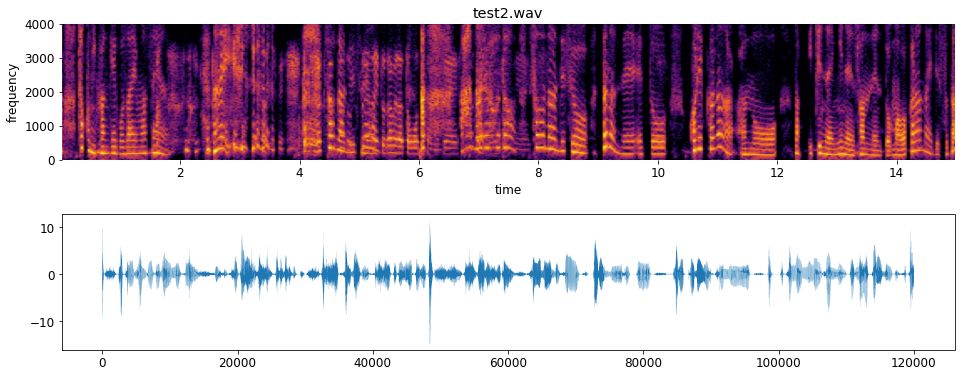

In [49]:
audiofile = 'test2.wav'
plot_audio(audiofile)
IPython.display.Audio(audiofile)

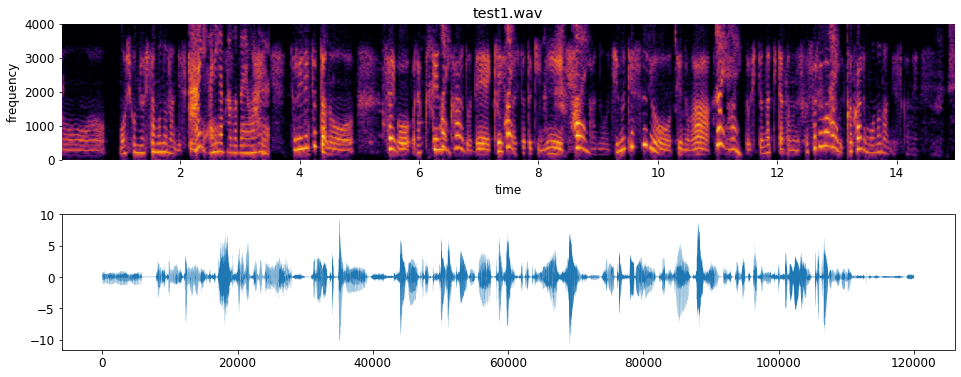

In [50]:
audiofile = 'test1.wav'
plot_audio(audiofile)
IPython.display.Audio(audiofile)